In [36]:
# Import statements

import numpy as np
import matplotlib.pyplot as plt

import matplotlib
from skimage import color
from scipy.ndimage import imread
from skimage.transform import resize
from pylab import rcParams

#ipython setting
rcParams['figure.figsize'] = (20, 12)

$\newcommand{\vecl}[1]{\begin{pmatrix}#1\end{pmatrix}}$ 
$\newcommand{\hvec}[1]{\widetilde{\boldsymbol{#1}}}$
$\newcommand{\nvec}[1]{\boldsymbol{#1}}$

## Histogram of oriented gradients

--Text--

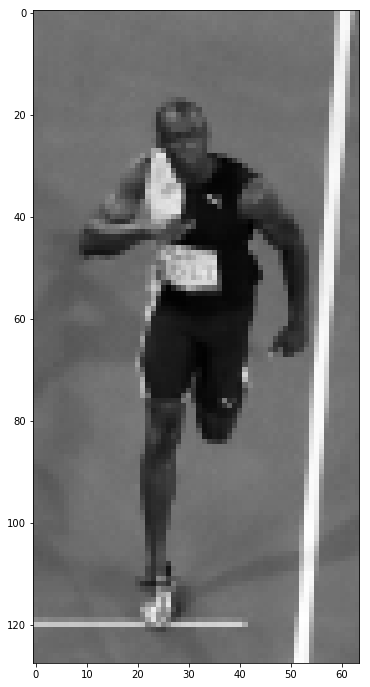

In [2]:
def subImage(f, yRange, xRange, yAnchor, xAnchor):
    
    return f[xAnchor:xAnchor+xRange:, yAnchor:yAnchor+yRange:]

bolt = resize(color.rgb2gray(subImage(imread('bolt2.png'), 100, 200, 205, 95)), (128, 64))

plt.imshow(bolt, cmap='gray')
plt.show()

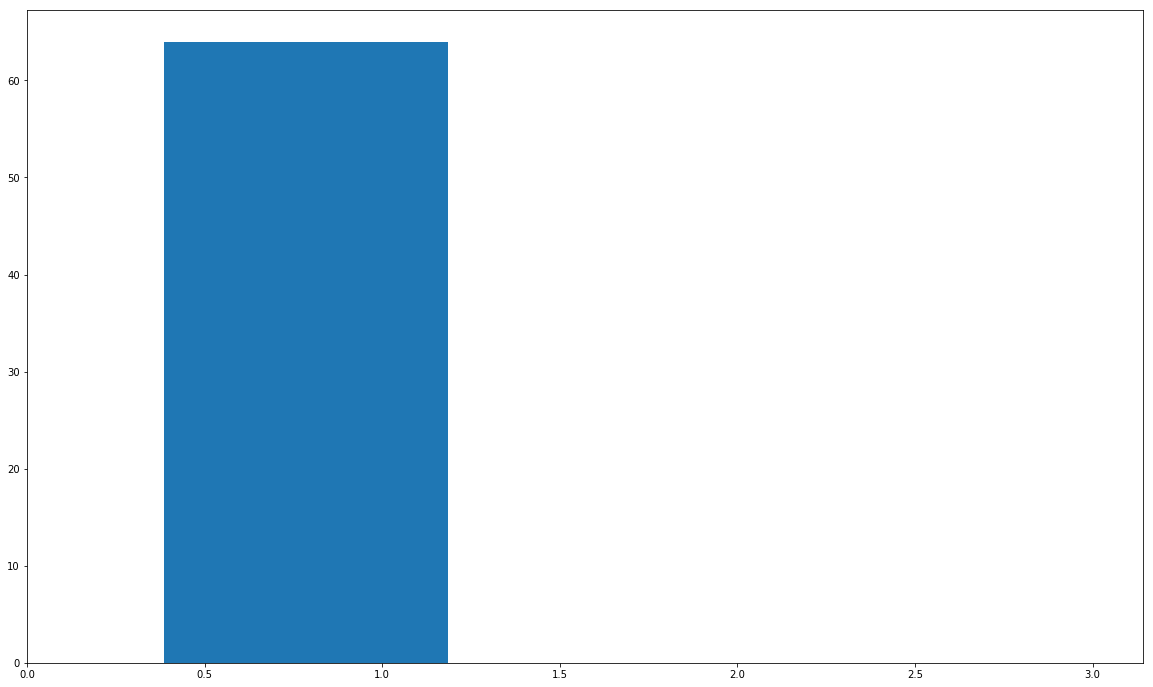

In [99]:
import cv2
from matplotlib.ticker import FuncFormatter

def cart2polar(fx, fy):
    
    mag = np.sqrt(fx * fx + fy * fy)
    angle = np.arctan2(fy, fx)
    
    return mag, angle
    
def HOG8x8(fx, fy):
    
    mags, angles =  cart2polar(fx, fy)
    shapeX, shapeY = fx.shape
    mags = mags.reshape(shapeX * shapeY)
    angles = angles.reshape(shapeX * shapeY)
    
    return np.histogram(angles, bins=np.linspace(0, np.pi, 9), weights=mags)
    

gx = np.ones((8,8))*np.sin(np.pi/4)
gy = np.ones((8,8))*np.cos(np.pi/4)
hist, bin_edges = HOG8x8(gx, gy)

plt.bar(bin_edges[:-1], hist)
plt.xlim(min(bin_edges), max(bin_edges))
plt.show()  

1

1

1

1

1

1

1
